In [1]:
from IPython.display import Image
%matplotlib inline
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [2]:
#helper function
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [3]:
iris = datasets.load_iris()
print("feature name")
print(iris.feature_names)
print('\nClass names')
print(iris.target_names)
print("\nData Eaxmple")
print(iris.data[0:5,])

feature name
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Class names
['setosa' 'versicolor' 'virginica']

Data Eaxmple
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
X_sepal = iris.data[:, [1, 2]]
y_sepal = iris.target
print("septal")
print(X_sepal[0:5])

X_petal = iris.data[:, [2, 3]]
y_petal = iris.target
print("\npeptal")
print(X_petal[0:5])

print("\nClass names")
print(iris.target_names)

septal
[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]]

peptal
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

Class names
['setosa' 'versicolor' 'virginica']


In [5]:
#using X_petal feature
X_train, X_test, y_train, y_test = train_test_split(X_petal, y_petal, test_size=0.5, random_state=0)

In [6]:
#Standardization
#z = (X-mean)/std
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("X_train")
print(X_train[0:5])
print("\nX_train_std")
print(X_train_std[0:5])

X_train
[[1.5 0.2]
 [5.1 1.8]
 [3.  1.1]
 [1.4 0.3]
 [4.5 1.5]]

X_train_std
[[-1.13425915 -1.17011609]
 [ 0.75267844  0.76662778]
 [-0.34803516 -0.08069766]
 [-1.18667408 -1.0490696 ]
 [ 0.43818884  0.40348831]]



Class names
['setosa' 'versicolor' 'virginica']


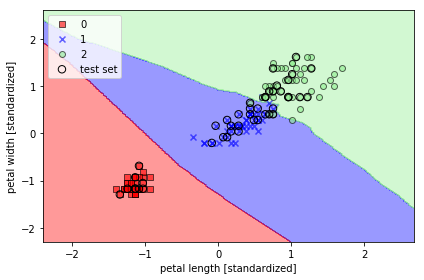

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./KNN_Decision_Regions.png', dpi=300)
print("\nClass names")
print(iris.target_names)
plt.show()


Class names
['setosa' 'versicolor' 'virginica']


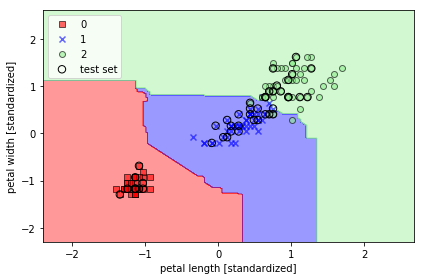

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nClass names")
print(iris.target_names)
#plt.savefig('./KNN_Decision_Regions.png', dpi=300)
plt.show()

## Make a following figure by using sepal features

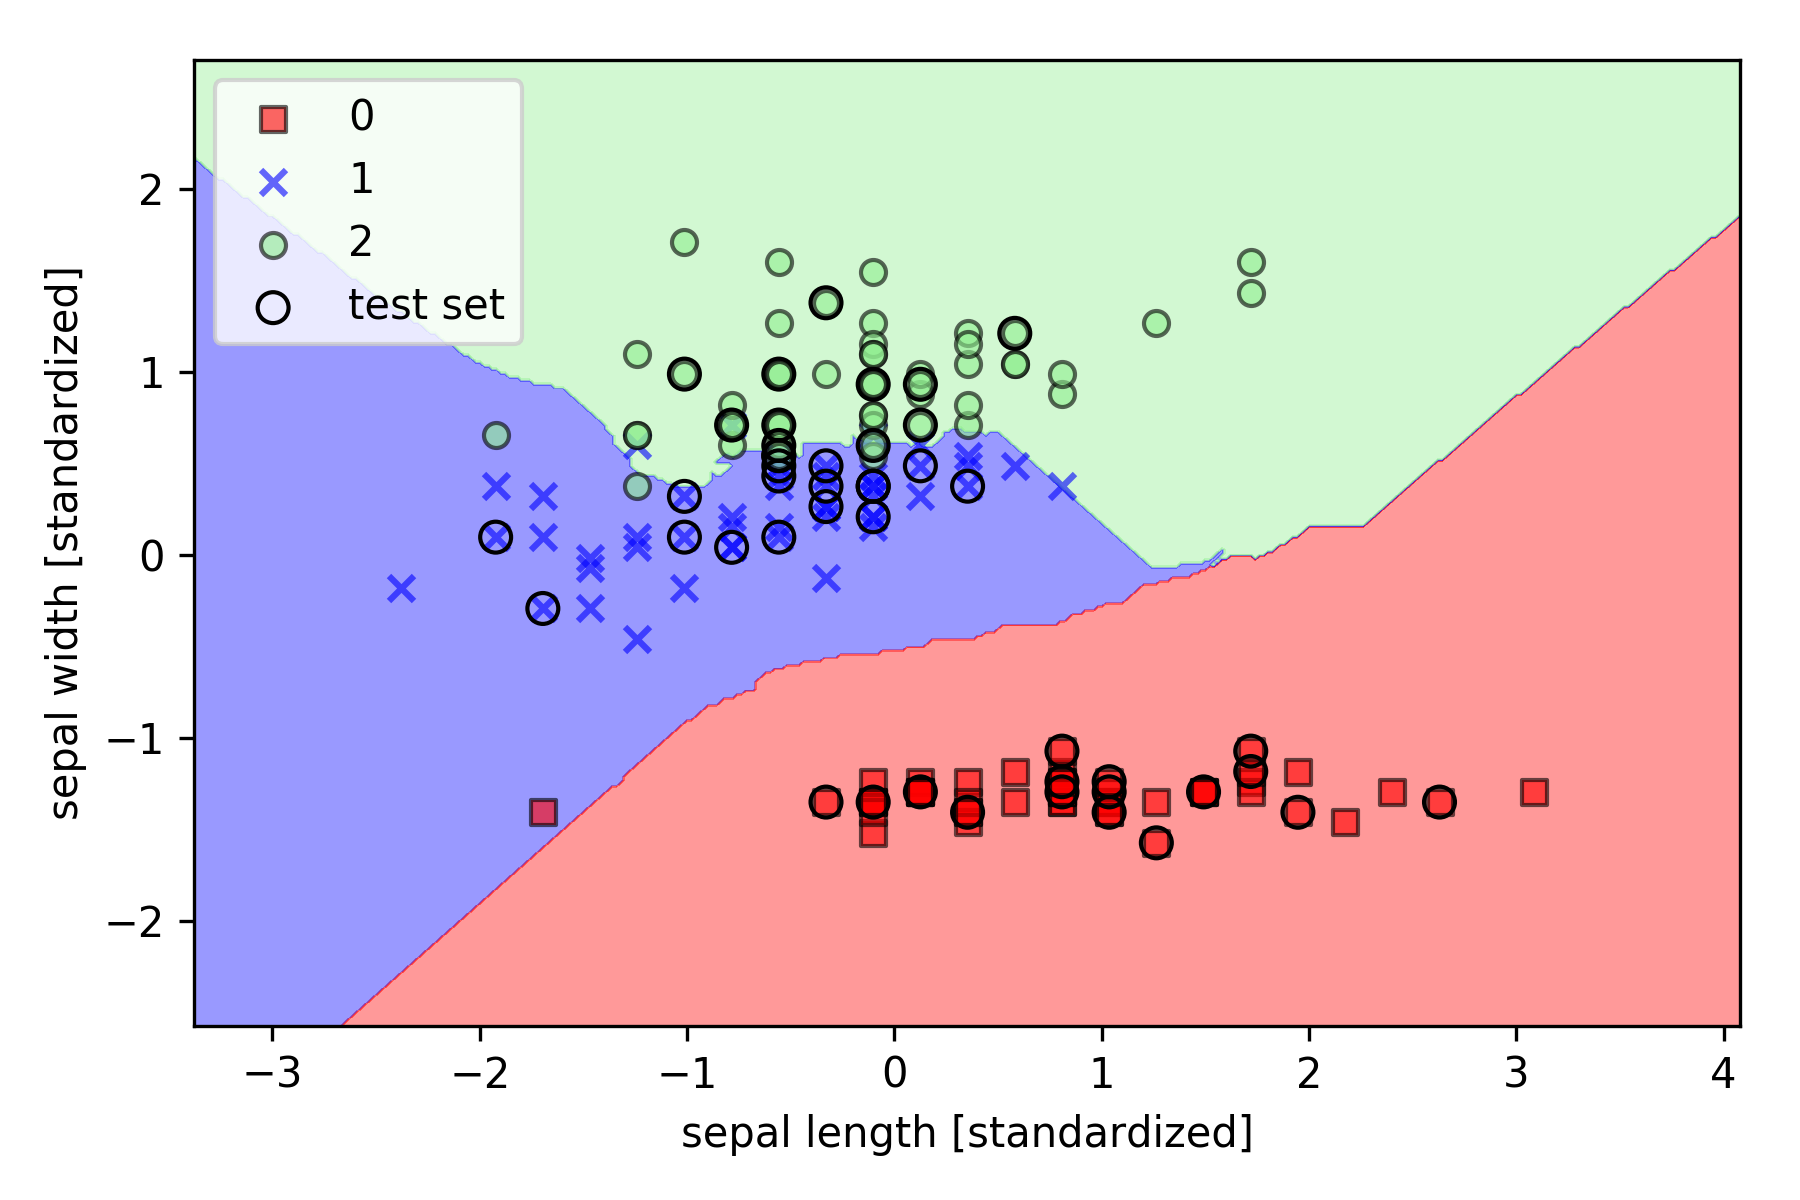

In [9]:
Image(filename='./KNN_Decision_Regions_Sepal.png', width=500) 

In [10]:
y_pred = knn.predict(X_test_std)
print("Case from training dataset")
print(X_test_std[0:5])

print("\nPredicted results from KNN model")
print(y_pred[0:5])

Case from training dataset
[[ 0.75267844  1.49290673]
 [ 0.17611417 -0.20174415]
 [-1.18667408 -1.17011609]
 [ 1.38165763  0.76662778]
 [-1.13425915 -1.17011609]]

Predicted results from KNN model
[2 1 0 2 0]


In [11]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.88      0.97      0.92        30
  virginica       0.95      0.83      0.89        24

avg / total       0.94      0.93      0.93        75


 Accuracy
0.9333333333333333


## Using Full dataset

In [12]:
#using full dataset
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Standardization
#z = (X-mean)/std
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test_std)
print("Case from training dataset")
print(X_test_std[0:5])

print("\nPredicted results from KNN model")
print(y_pred[0:5])

Case from training dataset
[[-0.06116668 -0.70169103  0.75267844  1.49290673]
 [ 0.15728574 -2.13696812  0.17611417 -0.20174415]
 [-0.38884531  2.64728887 -1.18667408 -1.17011609]
 [ 1.57722647 -0.46247818  1.38165763  0.76662778]
 [-0.93497635  0.73358607 -1.13425915 -1.17011609]]

Predicted results from KNN model
[2 1 0 2 0]


In [14]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.91      0.97      0.94        30
  virginica       0.95      0.88      0.91        24

avg / total       0.95      0.95      0.95        75


 Accuracy
0.9466666666666667
